# **Scientific journal recommender for submitting a publication**

In [5]:
import pandas as pd

folder = "dataset/"

'''
from google.colab import drive
drive.mount('/content/drive')
colab_folder = 'drive/MyDrive/Colab Notebooks/ScientificJournalRecommenderForSubmittingPublication/'
folder = colab_folder + folder
'''
df = pd.read_csv(folder + 'selected_cleaned.csv')

target = 'journal'

features = df.columns.tolist()
features.remove(target)

# Text Representation: all the words of the selected features in a single column

df['X'] = df[features[0]]
for i in range(1, len(features)):
    df['X'] = df['X'] + df[features[i]]

# Remove null values
df = df.dropna(subset=['X'])

# Encode target_name
labels = df[target].unique()
df['y'] = df[target].replace(labels, list(range(len(labels))))

# Remove unnecessary columns
df = df[['X', 'y']]
print(df.info())
df.head()
df.to_csv(folder + 'selected_cleaned_combined_text.csv', index=False)

C:\Users\danie\AppData\Local\Temp\ipykernel_26200\1864768517.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df[target].replace(labels, list(range(len(labels))))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179104 entries, 0 to 179103
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   X       179104 non-null  object
 1   y       179104 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB
None


Word frequency analysis for feature: X

Number of unique words:  68615
Number of words with frequency >= 2: 68615
Number of words with frequency >= 3: 68615
Number of words with frequency >= 4: 68615
Number of words with frequency >= 5: 68615
Number of words with frequency >= 6: 68615
Number of words with frequency >= 7: 68615
Number of words with frequency >= 8: 68615
Number of words with frequency >= 9: 68615
Number of words with frequency >= 10: 68615
Number of words with frequency >= 11: 68615
Number of words with frequency >= 12: 68615
Number of words with frequency >= 13: 68615
Number of words with frequency >= 14: 68615


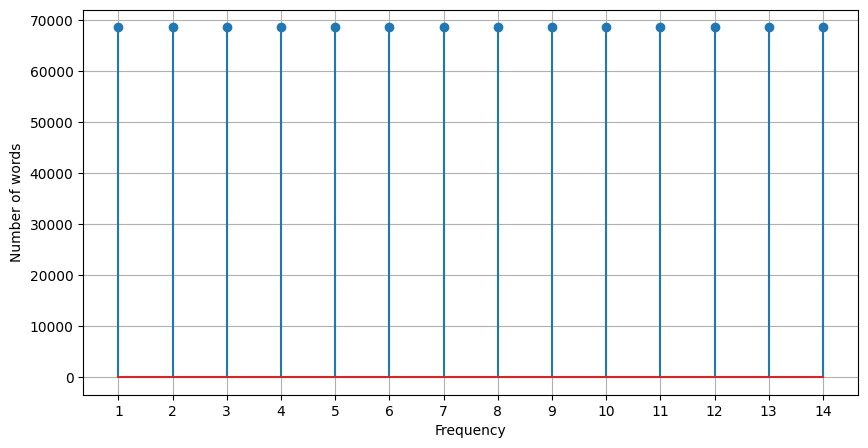

In [6]:
from utils import word_frequency_analysis

df = pd.read_csv(folder + 'selected_cleaned_combined_text.csv')

# Number words for each frequency
number_words_frequency = word_frequency_analysis(df, 'X', 15)

# Divide the dataset into training and test sets

In [7]:
from sklearn.model_selection import train_test_split
import gc

df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)
# Delete df to free memory
df = None
gc.collect()

4814

## Bag of Words

The **Bag of Words** is a representation of a text that describes the occurrence of words within a document.
The Bag of Words is created using the following methods:
* **CountVectorizer**: It counts the number of times a word appears in a document.
* **TfidfVectorizer**: It counts the number of times a word appears in a document, but it also takes into account the frequency of the word in the entire corpus.

Parameters:
* **max_features**: build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

frequency = 13 #7
max_features = number_words_frequency[frequency]
print(f"Words with frequency >= {frequency}: Max features: {max_features}")

bowCount = CountVectorizer(max_features=max_features)

X_train_Count = bowCount.fit_transform(df_train['X']).toarray()
X_test_Count = bowCount.transform(df_test['X']).toarray()

bowTfidf = TfidfVectorizer(max_features=max_features)

X_train_Tfidf = bowTfidf.fit_transform(df_train['X']).toarray()
X_test_Tfidf = bowTfidf.transform(df_test['X']).toarray()

y_train = df_train['y']
y_test = df_test['y']

## Clasification

The classification is performed using the **Random Forest** algorithm.
It is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
from utils import evaluation_report, plot_class_distribution

plot_class_distribution(y_train, labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# BoW ConuntVectorizer
cls = RandomForestClassifier()
cls.fit(X_train_Count, y_train)
y_pred = cls.predict(X_test_Count)

evaluation_report(y_test, y_pred, labels)

In [ ]:
# BoW TfidfVectorizer
cls = RandomForestClassifier()
cls.fit(X_train_Tfidf, y_train)
y_pred = cls.predict(X_test_Tfidf)

evaluation_report(y_test, y_pred, labels)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)

# BoW ConuntVectorizer
X_train_under_sampled, y_train_under_sampled = sampler.fit_resample(X_train_Count, y_train)
plot_class_distribution(y_train_under_sampled, labels)

cls = RandomForestClassifier()
cls.fit(X_train_under_sampled, y_train_under_sampled)
y_pred = cls.predict(X_test_Count)

evaluation_report(y_test, y_pred, labels)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import gc

sampler = RandomUnderSampler(random_state=42)

# BoW TfidfVectorizer
X_train_under_sampled, y_train_under_sampled = sampler.fit_resample(X_train_Tfidf, y_train)

cls = RandomForestClassifier()
cls.fit(X_train_under_sampled, y_train_under_sampled)
y_pred = cls.predict(X_test_Tfidf)

evaluation_report(y_test, y_pred, labels)

X_train_under_sampled = None
y_train_under_sampled = None

gc.collect()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)

# BoW ConuntVectorizer
X_train_over_sampled, y_train_over_sampled = sampler.fit_resample(X_train_Count, y_train)
plot_class_distribution(y_train_over_sampled, labels)

cls = RandomForestClassifier()
cls.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = cls.predict(X_test_Count)

evaluation_report(y_test, y_pred, labels)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)

# BoW TfidfVectorizer
X_train_over_sampled, y_train_over_sampled = sampler.fit_resample(X_train_Tfidf, y_train)

cls = RandomForestClassifier()
cls.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = cls.predict(X_test_Tfidf)

evaluation_report(y_test, y_pred, labels)

In [ ]:
# Cleaning memory
import gc

bowCount = None
bowTfidf = None
X_train = None
X_test = None
y_test = None
y_train = None
y_pred = None
X_train_over_sampled = None
y_train_over_sampled = None
X_train_Count = None
X_test_Count = None
X_train_Tfidf = None
X_test_Tfidf = None

gc.collect()


## Connectionist techniques

In this case, after pre-processing, a neural network based on an LSTM unit is trained.

In [ ]:
import tensorflow as tf
import pandas as pd
device = tf.config.list_physical_devices('GPU')

#from google.colab import drive
#drive.mount('/content/drive')
#folder = 'drive/MyDrive/Colab Notebooks/ScientificJournalRecommenderForSubmittingPublication/datasets/'
folder = 'dataset/'
df = pd.read_csv(folder + 'selected_cleaned.csv')

target = 'journal'

features = df.columns.tolist()
features.remove(target)

df.info()

In [ ]:
from utils import sentences_length_analysis
from utils import word_frequency_analysis

sentences_length = {}
number_words_frequency = {}

feature = features[0]
sentences_length_analysis(df, feature, [0, 300])
sentences_length_analysis(df, feature, [150, 300])
sentences_length_analysis(df, feature, [250, 300])

In [ ]:
sentences_length[feature] = 280

number_words_frequency[feature] = word_frequency_analysis(df, feature, 20)

In [ ]:
frequency = 4 
number_words_frequency[feature] = number_words_frequency[feature][frequency]

print(f"Feature: {feature}")
print(f"Words with frequency >= {frequency}: {number_words_frequency[feature]}")
print(f"Sentences length: {sentences_length[feature]}")

In [ ]:
feature = features[1]

sentences_length_analysis(df, feature, [0, 30])
sentences_length_analysis(df, feature, [10, 25])
sentences_length_analysis(df, feature, [15, 25])

In [ ]:
sentences_length[feature] = 18

number_words_frequency[feature] = word_frequency_analysis(df, feature, 25)

In [ ]:
frequency = 2
number_words_frequency[feature] = number_words_frequency[feature][frequency]

print(f"Feature: {feature}")
print(f"Words with frequency >= {frequency}: {number_words_frequency[feature]}")
print(f"Sentences length: {sentences_length[feature]}")

In [ ]:
feature = features[2]

sentences_length_analysis(df, feature, [0, 30])
sentences_length_analysis(df, feature, [8, 25])
sentences_length_analysis(df, feature, [8, 17])

In [ ]:
sentences_length[feature] = 14

number_words_frequency[feature] = word_frequency_analysis(df, feature, 20)

In [ ]:
frequency = 2
number_words_frequency[feature] = number_words_frequency[feature][frequency]

print(f"Feature: {feature}")
print(f"Words with frequency >= {frequency}: {number_words_frequency[feature]}")
print(f"Sentences length: {sentences_length[feature]}")

In [ ]:
# Convert list of words to string representation
def join_elements(list_like_string):
    return ' '.join(eval(list_like_string))

for feature in features:
    df[feature] = df[feature].apply(join_elements)

df.fillna("").astype(str)
df.to_csv(folder + 'selected_cleaned_sentences.csv', index=False)

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

folder = 'dataset/'
df = pd.read_csv(folder + 'selected_cleaned_sentences.csv')

target = 'journal'

features = df.columns.tolist()
features.remove(target)

# Replacing labels names with int
labels = df[target].unique()
num_classes = len(labels)
df[target] = df[target].replace(labels, list(range(len(labels))))

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Convert int labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

X_train = X_train.fillna("").astype(str)
X_test = X_test.fillna("").astype(str)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text for each feature
def tokenize_text_feature(X_train, X_test, length_analysis, number_words_frequency):
    print(f"Number words: {number_words_frequency}\t-\tSequence length: {length_analysis}")
    
    tokenizer = Tokenizer(num_words=number_words_frequency)
    tokenizer.fit_on_texts(X_train)

    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_train_pad = pad_sequences(X_train_seq, maxlen=length_analysis)

    X_test_seq = tokenizer.texts_to_sequences(X_test)
    X_test_pad = pad_sequences(X_test_seq, maxlen=length_analysis)

    return X_train_pad, X_test_pad

def tokenize_text(X_train, X_test, features, length_analysis, number_words_frequency):
    X_train_pad = dict()
    X_test_pad = dict()

    for feature in features:
        print('Feature: ' + feature)
        X_train_pad[feature], X_test_pad[feature] = tokenize_text_feature(X_train[feature], X_test[feature], length_analysis[feature], number_words_frequency[feature])
    
    return X_train_pad, X_test_pad


X_train_pad, X_test_pad = tokenize_text(X_train, X_test, features, sentences_length, number_words_frequency)

In [ ]:
import itertools
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, concatenate, Dropout, Bidirectional, BatchNormalization
from metrics import f1_score

def create_model(features, length_analysis, number_words, embedding_dims, lstm_units, dense_sizes, dropouts, num_classes, use_normalization=False):
    inputs = []
    models = []

    model_name = f"{'Norm_' if use_normalization else ''}Embed_{'_'.join([f'{feat}{dim}' for feat, dim in embedding_dims.items()])}_LSTM_{'_'.join([f'{feat}{unit}' for feat, unit in lstm_units.items()])}_Dense_{'_'.join(map(str, dense_sizes))}_Drop_{'_'.join(map(str, dropouts))}"

    print("Model name: ", model_name)

    for feature in features:
        input_layer = Input(shape=(length_analysis[feature],), name=feature)
        inputs.append(input_layer)

        embedding_layer = Embedding(
            input_dim=number_words[feature],
            output_dim=embedding_dims[feature],
            input_length=length_analysis[feature],
            name=f'{feature}_Embedding'
        )(input_layer)
        
        lstm_layer = Bidirectional(LSTM(
            units=lstm_units[feature],
            dropout=0.2,
            recurrent_dropout=0.2),
            name=f'{feature}_Bidirectional_LSTM'
        )(embedding_layer)
        models.append(lstm_layer)

    concatenated_features = concatenate(models, name='Concatenate_Features')
    if use_normalization:
        concatenated_features = BatchNormalization(name='Batch_Normalization')(concatenated_features)

    for i, (dense_size, dropout) in enumerate(zip(dense_sizes, dropouts)):
        if i == 0:
            dense_layer = Dense(dense_size, activation='relu', name=f'Dense_{i+1}')(concatenated_features)
        else:
            dense_layer = Dense(dense_size, activation='relu', name=f'Dense_{i+1}')(dropout_layer)
            
        dropout_layer = Dropout(dropout, name=f'Dropout_{i+1}')(dense_layer)

    output_layer = Dense(units=num_classes, activation='softmax', name=f'Output')(dropout_layer)

    model = Model(inputs=inputs, outputs=output_layer, name=model_name)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_score])
    print(model.summary())
    
    return model, model_name

# Define ranges for fine-tuning for each feature
embedding_dim_ranges = {
    features[0]: [150, 200],
    features[1]: [100, 150],
    features[2]: [100, 150]
}

lstm_units_ranges = {
    features[0]: [100, 200, 300],
    features[1]: [10, 20, 30],
    features[2]: [10, 20, 30]
}

#Test values
embedding_dim_ranges = {
    features[0]: [150],
    features[1]: [100],
    features[2]: [100]
}
lstm_units_ranges = {
    features[0]: [100],
    features[1]: [10],
    features[2]: [10]
}

dense_sizes_range = [[64, 128], [128, 256]]
dropout_range = [0.2, 0.3, 0.5]

models = {}

for embedding_dims in itertools.product(*embedding_dim_ranges.values()):
    for lstm_units in itertools.product(*lstm_units_ranges.values()):
        embedding_config = dict(zip(features, embedding_dims))
        lstm_config = dict(zip(features, lstm_units))
        for dense_sizes in dense_sizes_range:
            for dropouts in [dropout_range] * len(dense_sizes):  # Ensure the dropout list matches the number of dense layers 
                for use_normalization in [True, False]:
                    model, model_name = create_model(features, sentences_length, number_words_frequency, embedding_config, lstm_config, dense_sizes, dropouts, num_classes, use_normalization=use_normalization)
                    models[model_name] = model
                    # Write the model to a file
                    model.save(f'models/{model_name}.keras')

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

evaluation_results = {}

for model_name, model in models.items():
    print(f"Training and evaluating model: {model_name}")

    # Train the model
    history = model.fit(X_train_pad, y_train,
                        batch_size=64, epochs=20,
                        validation_data=(X_test_pad, y_test),
                        callbacks=[
                            EarlyStopping(monitor='val_loss', patience=10)
                        ])

    # Store the best validation F1 score
    evaluation_results[model_name] = max(history.history['val_f1_score'])

    # Plot Loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss: {model_name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True)

    # Plot F1 Score
    plt.subplot(1, 2, 2)
    plt.plot(history.history['f1_score'], label='Train F1 Score')
    plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
    plt.title(f'Model F1 Score: {model_name}')
    plt.ylabel('F1 Score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Display the best validation F1 score for each model
for model_name, score in evaluation_results.items():
    print(f"{model_name}: Best Validation F1 Score = {score}")

In [ ]:
import numpy as np

def evaluate_model(model, X_test_pad, y_test, labels):
    # Make predictions
    y_pred = model.predict(X_test_pad)
    y_pred = np.argmax(y_pred, axis=1)

    return evaluation_report(y_test, y_pred, labels)

evaluation_reports = {}

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    evaluation_reports[model_name] = evaluate_model(model, X_test_pad, y_test)